<a href="https://colab.research.google.com/github/flockofsparrows/Custom-Car-Order/blob/main/Larissa_NY_Times_Archive_API_Final_Hackathon_August_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=red> Software Developer Foundations - Final Hackathon

## The NY Times Archive API Challenge</font>


# What Happened on the Day that you were Born?

Python contructs we'll use in this Hackathon:
- Public API data ingest.
- Retrieve JSON data from the API for a _month_ and _year_.
- Filter the data for a specific _day of the month_.
- Use `pandas` to manipulate the data.
- Create a CSV file of the resulting dataset within `pandas`.


## Description of the Coding Exercise
- We will query the **New York Times Archive API** for all the articles the Times has accessible from the API from your _BIRTH MONTH_ and _BIRTH YEAR_.
 - You can signup for an API Key at the [NY Times API Main Site](https://developer.nytimes.com/). 
  - Or you can use `kEBQsEG9EGEfQNutEqFNXBSq6m7etGAk`.
 - Start by reviewing the webpage here: [NY Times Archive API](https://developer.nytimes.com/docs/archive-product/1/overview).
 - Study the `Example Call` of the `Archive` API endpoint.
 - Be sure you **TEST** your code following every step.
 - Ask questions.
- **OPTIONAL INPUT**: Ask the user for their birth month and year to query the NY Times Archive API.

## Helpful Steps
- After you understand how to invoke the endpoint, use the _Firefox_ browser to help you understand the structure of the API data by making a sample API call in the browser location bar.
- Instead of asking the user to input data, you **should** first _hardcode_ a birth month and birth year such as:
```python
year = "1991"
month = "12"
```

**NOTE**:  Because we are dealing with URLs, you want all the data to be `string` datatypes.



# STEP 1. Make the Appropriate API Call and get the JSON Data

- You will obtain JSON data from the Archive API
 - Construct a URL to pass to the API.  If you're not sure of the format, then go back to the [NY Times Archive API](https://developer.nytimes.com/docs/archive-product/1/overview) and study the examples, as suggested earlier.
 - Display the URL that you constructed.
 - This code can help you to construct the API call:

 ```
 # Construct the URL
month_url = month + ".json"
url_parts = (base_url,year,month_url)
url = "/".join(url_parts)
print(url)
```
- Use `requests.get()` to make your API call.
- Use the `json()` method to convert the returned JSON data to Python data structures.
- **TEST**:  Put the URL that is displayed into your Firefox browser and study the data returned.



In [ ]:
import requests
import csv

# What is the "base URL" for the API?
base_url = "https://api.nytimes.com/svc/archive/v1"
myapikey = "kEBQsEG9EGEfQNutEqFNXBSq6m7etGAk"

year = "1985"
month = "10"
# year = input("Enter your 4-digit birth year: ")
# month = input("Enter a digit indicating the month of the year that you were born (1-12): ")

# Construct the URL
month_url = month + ".json"
url_parts = (base_url,year,month_url)
url = "/".join(url_parts)
print(url)
"https://api.nytimes.com/svc/archive/v1/1985/10.json"
# Setup the querystring
#query_string = {url, "apikey": myapikey} 
# Call request and convert the JSON data to a Python dict
# Call the API and retrieve the returned JSON data
responseData = requests.get("https://api.nytimes.com/svc/archive/v1/1985/10.json?api-key=kEBQsEG9EGEfQNutEqFNXBSq6m7etGAk")
# Convert JSON data into a python dictionary
pyData = responseData.json()

https://api.nytimes.com/svc/archive/v1/1985/10.json


# STEP 2. Obtain the Data that Contains the Archived Articles

- There are two top-level JSON keys.
  - `copyright`
  - `response`
- Display the value of the `copyright` key.
- Capture the `response` value in a Python dictionary called `response_dict`. 
- What are the two **keys** in `response_dict`?
- Use `response_dict['meta']['hits']` to display a statement like the following after you retrieve the data in 
 - `There are 7078 articles in month 12 of 1991.`



In [ ]:
# Get the response data
response_dict = pyData["response"]
# Print out the "hits" key to show the number of articles that were returned

# by the NY Times Archive API
print(f"There are {response_dict['meta']['hits']} articles in month 10 of 1985.")


There are 9889 articles in month 10 of 1985.


# Step 3. Store the data from the `docs` key

Be sure you understand that the API endpoint returned **all of the articles published in the MONTH of the given YEAR.** 

Again, study the `JSON` data that is returned from the API call.  It is suggested that you use Firefox to review the response JSON data.

- What **JSON `key`** contains all articles archived for that month and year?  Retrieve the articles from `response_dict` and assign that list to **a variable called `articles`**.
  - Use an `f-string` to display the number of articles in the `articles` list using the `len` function.
  - Select a single entry in the `articles` list by selecting any index. Note that each list element is a Python dictionary.
  - Display the `key/value` pairs by using:
```python
for key, value in articles[0].items():
  #your print statement
```   

The output should look something like this:
```
There are 7078 in this API call.
abstract :   BETTING people in the real estate community here think the odds are excellent that riverboat gambling, approved by the State Legislature in July, will spur development along the Mississippi River waterfront downtown.   The law stipulated that construction of the boats could not begin until January 1992, and the first boats are not expected to begin operating until late in 1993. Nevertheless, real estate brokers and developers already have begun to prepare for what they think will be a daily influx of thousands of visitors.
web_url : https://www.nytimes.com/1991/12/01/realestate/focus-new-orleans-builders-betting-on-riverboat-gambling.html
snippet : 
lead_paragraph : BETTING people in the real estate community here think the odds are excellent that riverboat gambling, approved by the State Legislature in July, will spur development along the Mississippi River waterfront downtown.
print_section : 10
print_page : 5
source : The New York Times
multimedia : []
headline : {'main': 'Focus: New Orleans; Builders Betting on Riverboat Gambling', 'kicker': None, 'content_kicker': None, 'print_headline': 'Focus: New Orleans; Builders Betting on Riverboat Gambling', 'name': None, 'seo': None, 'sub': None}
keywords : [{'name': 'glocations', 'value': 'New Orleans (La)', 'rank': 1, 'major': 'N'}, {'name': 'glocations', 'value': 'Mississippi River', 'rank': 2, 'major': 'N'}, {'name': 'glocations', 'value': 'Louisiana', 'rank': 3, 'major': 'N'}, {'name': 'subject', 'value': 'Gambling', 'rank': 4, 'major': 'N'}, {'name': 'subject', 'value': 'Area Planning and Renewal', 'rank': 5, 'major': 'N'}, {'name': 'subject', 'value': 'Law and Legislation', 'rank': 6, 'major': 'N'}, {'name': 'subject', 'value': 'Boats and Boating', 'rank': 7, 'major': 'N'}]
pub_date : 1991-12-01T05:00:00+0000
document_type : article
news_desk : Real Estate Desk
section_name : Real Estate
byline : {'original': 'By Lettice Stuart', 'person': [{'firstname': 'Lettice', 'middlename': None, 'lastname': 'Stuart', 'qualifier': None, 'title': None, 'role': 'reported', 'organization': '', 'rank': 1}], 'organization': None}
type_of_material : News
_id : nyt://article/004d96e7-7a02-5dfc-bb41-b085bb7836ef
word_count : 1322
uri : nyt://article/004d96e7-7a02-5dfc-bb41-b085bb7836ef
```

In [ ]:
# Grab all the articles from the response_dict.
articles = response_dict["docs"]
print(f"There are {len(articles)} in this API call.")

# What key do you need to index?
for key, value in articles[13].items():
  print(f"{key}: {value}")

There are 9889 in this API call.
abstract:   COMPUTER games are pretty much passe today, except perhaps among a small core of die-hard fanatics. All the same, their influence on personal computing has been tremendous, not merely because of the boost they gave to ''home'' computer sales, but also because of their profound effect on the direction of personal computing as a whole.   At first glance, there seems to be a considerable gap, indeed a chasm, between consumer games and such practical applications as word processing, spreadsheet manipulation and data-base management. Where the influence of those games is unmistakable, however, is in the design of the hardware and software now on the market.
web_url: https://www.nytimes.com/1985/10/01/science/personal-computers-key-influence-of-games-is-seen-in-new-trends.html
snippet: 
lead_paragraph: COMPUTER games are pretty much passe today, except perhaps among a small core of die-hard fanatics. All the same, their influence on personal compu

# Step 4. Filter the Data ONLY for your **Date of Birth**.

### **What do we have?**
- All of the articles published in the MONTH of the given YEAR.
- These articles are currently stored in a list called `articles`.

### **What we want:**
- We only want to consider the articles that were returned by the API for a single **day** in the _month/year_ of our birth.
- Our next goal is to filter the data by a specific day of the month.

### Let's filter the data
- Create a string variable called `dob`. Assign your birth date in this format: `"yyyy-mm-dd"`.
- Create an empty `Python list` variable called `dobArticles`. 

- You will populate this list with all the **specific articles** returned by the API that are on YOUR **BIRTHDATE** from all the `articles` list.
- Walk through the `articles` list and query the `pub_date` key in the JSON. Use a `for` loop to traverse the `articles` list, one dictionary at a time.  The following steps all occur within the scope of the `for` loop:
 - Notice that the data is in the form: `"1991-12-05T05:00:00+0000"`
 - We only need the string data PRIOR to the `T`, so we can use a `str.split('T')` call on the **value** of the `pub_date` key.
 - When you `split` on `'T'`, the result can be stored in a tuple with 2 elements called `dayofmonth` and `garbage` because you don't need the data **after the `'T'`**.
 - Compare your `dob` to `dayofmonth`.
  - If there's a match, then `append` that dictionary to the `dobArticles` list.
- This cell should display something like this:
 - `There were 598 articles in the NY Times Archive published on your date of birth.`

In [ ]:
# Put your birthdate in this format yyyy-mm-dd

# Assign that STRING to a variable called dob
dob = "1985-10-25"
# Create an empty python list variable called 'dobArticles'
dobArticles = []
# go through the list using a 'for' loop to look for each date and then only use the first part [0] of the split on "T" & assign that to variable called 'dayofmonth'
for article in articles:
  dayofmonth = article["pub_date"].split("T")[0]
  
# within the 'for' loop, COMPARE  the variable 'dob' value to each date found in the 'for' loop iteration assigned to 'dayofmonth' & if == then add/append that article to empty list 'dobArticles'
  if dob == dayofmonth:
    dobArticles.append(article)
# for the print statement, to get the number of articles that were published on my birthdate, use the len() function.
print(f'There were {len(dobArticles)} articles published on your date of birth.')


There were 397 articles published on your date of birth.


# Step 5. Display a single article from your birth date.

You should have all the articles from your date of birth stored in the `dobArticles` list.  

- What is the data type of a single element in this list?
- Use a `for` loop to display all the **keys** from a **single element of the `dobArticles` list**.

**TEST**.  Check the `pub_date` key.  Does it have the **date of your birth**?

In [ ]:
# for loop to show al the KEYS of a SINGLE element in the 'dobArticles' list
for article in dobArticles[0]:
  print(article)
print()
# what is the date type of a single element?
print(type(dobArticles[0]))

abstract
web_url
snippet
lead_paragraph
print_section
print_page
source
multimedia
headline
keywords
pub_date
document_type
news_desk
section_name
byline
type_of_material
_id
word_count
uri

<class 'dict'>


# Step 6. Let's move to `pandas` so that we can more easily manipulate the data.

We will read `dobArticles` into a `DataFrame` and use that data structure to complete the exercise.

- `import pandas as pd`
- Create a DataFrame called `dobarticles_df` and read the `dobArticles` list into it.
 - `dobarticles_df = pd.DataFrame(dobArticles)`
- Use `head()` to display the first 5 lines of this DataFrame
- Display any 3 consecutive articles from the `dobarticles_df` DataFrame using `iloc` and a `Python slice`.
```python
# Here's a slice example
df.iloc[a:b]
``` 

**TEST**.  Again, check the `pub_date` key.  Do all articles reflect the **date of your birth**?

In [ ]:
import pandas as pd
# create a DataFrame called "dobarticles_df" to hold/read the "dobArticles" list into it
dobarticles_df = pd.DataFrame(dobArticles)
# use .head() to display first 5 lines of this DataFrame
dobarticles_df.head(5)
# Display any 3 CONSECUTIVE articles from the "dobarticles_df" DataFrame using .iloc and a python slice
dobarticles_df.iloc[24:27]

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri
24,The French fashion industry celebrated itsel...,https://www.nytimes.com/1985/10/25/style/frenc...,,The French fashion industry celebrated itself ...,A,20,The New York Times,[],{'main': 'FRENCH FASHION SALUTES ITSELF WITH O...,"[{'name': 'glocations', 'value': 'France', 'ra...",1985-10-25T05:00:00+0000,article,Style Desk,Style,"{'original': 'By Bernadine Morris, Special To ...",News,nyt://article/1026108c-a6b8-5c3f-b256-04ea51a4...,853,nyt://article/1026108c-a6b8-5c3f-b256-04ea51a4...
25,The International Center for Photography ann...,https://www.nytimes.com/1985/10/25/arts/photog...,,The International Center for Photography annou...,C,3,The New York Times,[],{'main': 'Photography Center To Open New Branc...,"[{'name': 'organizations', 'value': 'PHOTOGRAP...",1985-10-25T05:00:00+0000,article,Weekend Desk,Arts,"{'original': '', 'person': [], 'organization':...",News,nyt://article/105710d5-8cbf-53db-abc0-0e853c17...,172,nyt://article/105710d5-8cbf-53db-abc0-0e853c17...
26,The Delaware Supreme Court yesterday delayed...,https://www.nytimes.com/1985/10/25/business/co...,,The Delaware Supreme Court yesterday delayed a...,D,5,The New York Times,[],"{'main': 'Court Gives Revlon a Stay', 'kicker'...","[{'name': 'organizations', 'value': 'FORSTMANN...",1985-10-25T05:00:00+0000,article,Financial Desk,Business Day,"{'original': '', 'person': [], 'organization':...",News,nyt://article/11d8912f-cc54-538d-83a2-28d5451a...,138,nyt://article/11d8912f-cc54-538d-83a2-28d5451a...


# Step 7. Let's find what page each article appeared on. 

### How many articles are there on the front page?
- What **column** contains the data for the **specific page** that the article appeared on? 
- Display all the values from this single column of the `dobarticles_df` DataFrame.

In [ ]:
# Column name "print_page" contains the data for the SPECIFIC PAGE that the article appeared on.
# Display ALL the VALUES from this single column from the "dobarticles_df" DataFrame
dobarticles_df["print_page"]

0       4
1      18
2       6
3       6
4      26
       ..
392     6
393     6
394     6
395     6
396     1
Name: print_page, Length: 397, dtype: object

# Step 8. Let's find the articles that were on the **Front Page** of the NY Times (on your Birthdate).

### How many articles are there on the front page?
- Create another DataFrame called `frontpage_df` that chooses ONLY rows from the front page.
 - **HINT**:  How did we choose the _rank one_ rows from the `fortune500` `DataFrame` in class?
- Use `shape` to determine the number of articles that appeared on the front page of the NY Times on your birthday.

In [ ]:
# Create another DataFrame called "frontpage_df" that holds ONLY rows from the front page.
frontpage_df = dobarticles_df.loc[dobarticles_df['print_page'] == "1"]
frontpage_df.shape

(24, 19)

## Display the resulting `frontpage_df` DataFrame

- Use `iloc` to display 5 articles from the `frontpage_df` DataFrame. Again, use a slice to do this.
- Then, display the entire `frontpage_df` DataFrame

In [ ]:
# use .iloc() to display 5 consecutive articles from the 'fontpage_df'
frontpage_df.iloc[13,18]
# dispaly entire datagrame of 'frontpage_df' 
frontpage_df.head(24)

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri
10,"Because of a transmission failure, excerpts ...",https://www.nytimes.com/1985/10/25/nyregion/c-...,,"Because of a transmission failure, excerpts in...",B,1,The New York Times,[],"{'main': 'CORRECTION', 'kicker': None, 'conten...","[{'name': 'glocations', 'value': 'New York Cit...",1985-10-25T05:00:00+0000,article,Metropolitan Desk,New York,"{'original': '', 'person': [], 'organization':...",Correction,nyt://article/0710ae27-16b8-5df4-b2c3-f41f9c9a...,40,nyt://article/0710ae27-16b8-5df4-b2c3-f41f9c9a...
20,''This is a solemn moment. Leaders of all na...,https://www.nytimes.com/1985/10/25/nyregion/qu...,,''This is a solemn moment. Leaders of all nati...,B,1,The New York Times,[],"{'main': 'Quotation of the Day', 'kicker': Non...","[{'name': 'organizations', 'value': 'United Na...",1985-10-25T05:00:00+0000,article,Metropolitan Desk,New York,"{'original': '', 'person': [], 'organization':...",News,nyt://article/0e77df05-d16c-5508-91f5-abf93c2c...,36,nyt://article/0e77df05-d16c-5508-91f5-abf93c2c...
37,The House of Representatives today approved ...,https://www.nytimes.com/1985/10/25/us/house-vo...,,The House of Representatives today approved a ...,A,1,The New York Times,[],"{'main': 'SENATE IN A SNAG', 'kicker': 'HOUSE ...","[{'name': 'glocations', 'value': 'United State...",1985-10-25T05:00:00+0000,article,National Desk,U.S.,"{'original': 'By Jonathan Fuerbringer, Special...",News,nyt://article/197ce119-139f-55f7-8089-442bf7b3...,1269,nyt://article/197ce119-139f-55f7-8089-442bf7b3...
77,International President Reagan urged...,https://www.nytimes.com/1985/10/25/nyregion/ne...,,International,B,1,The New York Times,[],"{'main': 'NEWS SUMMARY: FRIDAY, OCTOBER 25, 19...","[{'name': 'subject', 'value': 'News and News M...",1985-10-25T05:00:00+0000,article,Metropolitan Desk,New York,"{'original': '', 'person': [], 'organization':...",Summary,nyt://article/37726eb6-10f4-5ace-9535-a17dba2c...,771,nyt://article/37726eb6-10f4-5ace-9535-a17dba2c...
80,"The Procter & Gamble Company, the Cincinnati...",https://www.nytimes.com/1985/10/25/business/p-...,,"The Procter & Gamble Company, the Cincinnati-b...",D,1,The New York Times,[],"{'main': 'P.&G. NET UP 12.1% IN QUARTER', 'kic...","[{'name': 'organizations', 'value': 'Sara Lee ...",1985-10-25T05:00:00+0000,article,Financial Desk,Business Day,"{'original': 'Special to the New York Times', ...",News,nyt://article/38282727-0828-5041-960a-5710db58...,785,nyt://article/38282727-0828-5041-960a-5710db58...
115,The United States sent a high-level official...,https://www.nytimes.com/1985/10/25/world/us-tr...,,The United States sent a high-level official t...,A,1,The New York Times,[],{'main': 'U.S. TRIES TO SPUR MIDEAST PEACE BID...,"[{'name': 'glocations', 'value': 'JORDAN, HASH...",1985-10-25T05:00:00+0000,article,Foreign Desk,World,"{'original': 'By Bernard Gwertzman', 'person':...",News,nyt://article/4f159029-670d-511a-9f32-f15c9acc...,1069,nyt://article/4f159029-670d-511a-9f32-f15c9acc...
117,"THERE has never been, in New York or elsewhe...",https://www.nytimes.com/1985/10/25/arts/from-l...,,"THERE has never been, in New York or elsewhere...",C,1,The New York Times,[],"{'main': 'FROM LIECHTENSTEIN, QUINTESSENCES', ...","[{'name': 'subject', 'value': 'Reviews', 'rank...",1985-10-25T05:00:00+0000,article,Weekend Desk,Arts,"{'original': 'By John Russell', 'person': [{'f...",Review,nyt://article/50628352-51fe-5a79-9982-ea59bdeb...,1682,nyt://article/50628352-51fe-5a79-9982-ea59bdeb...
135,"Representative Dan Rostenkowski, chairman of...",https://www.nytimes.com/1985/10/25/business/mo...,,"Representative Dan Rostenkowski, chairman of t...",D,1,The New York Times,[],"{'main': 'MOVE SEEN ON LOCAL TAX ISSUE', 'kick...","[{'name': 'glocations', 'value': 'United State...",1985-10-25T05:00:00+0000,article,Financial De

# Step 8. Extract the **Headlines** Column from the Front Page articles.

What Do We Have Currently?
- A `DataFrame` called `frontpage_df` that contains only articles that appeared on the **Front Page** of the NY Times on the **date of your birth**

- Using the `frontpage_df DataFrame`:
 - Look at the `headline` column.
 - Assign only the `headline` column to a variable called `headlines`.  The datatype of `headlines` is a `pandas Series`. 
    - Reminder:  A **`Series`** is very much like a list but it's NOT formally a `list` datatype.
 - Look at the first element of `headlines` using `iloc[0]`.
 - Print out `print(headlines)`.



In [ ]:
# Make a list of the printed headlines from the articles on the front page. Create a variable, 'headlines' to hold the headlines from my birthdate on the front page
headlines = frontpage_df["headline"]
# look at the fist element of 'headlines' using .iloc[0] 
headlines.iloc[0]
# print out 'print(headlines)'
print(headlines)

10     {'main': 'CORRECTION', 'kicker': None, 'conten...
20     {'main': 'Quotation of the Day', 'kicker': Non...
37     {'main': 'SENATE IN A SNAG', 'kicker': 'HOUSE ...
77     {'main': 'NEWS SUMMARY: FRIDAY, OCTOBER 25, 19...
80     {'main': 'P.&G. NET UP 12.1% IN QUARTER', 'kic...
115    {'main': 'U.S. TRIES TO SPUR MIDEAST PEACE BID...
117    {'main': 'FROM LIECHTENSTEIN, QUINTESSENCES', ...
135    {'main': 'MOVE SEEN ON LOCAL TAX ISSUE', 'kick...
145    {'main': 'U.N., 40, FAILS TO WIN ACCORD ON ITS...
151    {'main': 'SENATE SIGNALS SUPPORT FOR CURB ON I...
165    {'main': 'MORE IMPORTS BY CHRYSLER EXPECTED', ...
200    {'main': 'STATE APPROVES STADIUM STUDY', 'kick...
221    {'main': 'MIXED REVIEWS FOR WYMAN', 'kicker': ...
251    {'main': 'U.S. OFFICIALS REVEAL DISUNITY ON AR...
255    {'main': 'WEEKENDER GUIDE: Friday', 'kicker': ...
263    {'main': 'KOCH AND RIVALS CLASH IN DEBATE', 'k...
293    {'main': 'FORD ACQUIRES A STAKE IN ARTIFICIAL ...
296    {'main': 'DAUGHTER OF DU

# Step 9. Force the **`headlines`** Series to be a Python List 

Convert the `headlines Series` to a `list`. 
  - There's a function called `to_list()` that we will use to convert `headlines` Series to a Python `list`.  
```python
headlinesList = headlines.to_list()
```

- Use Colab to verify that you `headlinesList` is, indeed, a Python list. Do this by hovering over the `headlinesList` variable.
- Display the first element of `headlinesList`.
  - Note that this element is a Python `dictionary`.


In [ ]:
# Force the headlines Series to be a Python list using the .to_list() function to the variable 'headlinesList'
headlinesList = headlines.to_list()
# what data type is 'headlinesList'?
type(headlinesList)
#display first element of 'headlinesList'
headlinesList[0]

{'main': 'CORRECTION',
 'kicker': None,
 'content_kicker': None,
 'print_headline': 'CORRECTION',
 'name': None,
 'seo': None,
 'sub': None}

# Step 10. Create a List of only the Headlines from the **Date of your Birth**

Let's populate a Python list of the Print Headlines.
 - Create a `Python list` variable called `printHeadlines`.
 ```python
 printHeadlines = []
 ```

 - For each element in `headlinesList`, `append` the value of the `print_headline` key to `printHeadlines`.
 - Display the resulting `printHeadlines` list using a `for` loop.


In [ ]:
# Create a list [] withe the variable name, 'printHeadlines'
printHeadlines = []
# use a 'for' loop to go through each element in 'headlinesList' to add/append the VALUE of 'headlinesList' key to the list, 'printHeadlines'
for article in headlinesList:
  printHeadlines.append(headlinesList)
print(printHeadlines)

[[{'main': 'CORRECTION', 'kicker': None, 'content_kicker': None, 'print_headline': 'CORRECTION', 'name': None, 'seo': None, 'sub': None}, {'main': 'Quotation of the Day', 'kicker': None, 'content_kicker': None, 'print_headline': 'Quotation of the Day', 'name': None, 'seo': None, 'sub': None}, {'main': 'SENATE IN A SNAG', 'kicker': 'HOUSE VOTES BILL ON SPENDING CUTS', 'content_kicker': None, 'print_headline': 'HOUSE VOTES BILL ON SPENDING CUTS; SENATE IN A SNAG', 'name': None, 'seo': None, 'sub': None}, {'main': 'NEWS SUMMARY: FRIDAY, OCTOBER 25, 1985', 'kicker': None, 'content_kicker': None, 'print_headline': 'NEWS SUMMARY: FRIDAY, OCTOBER 25, 1985', 'name': None, 'seo': None, 'sub': None}, {'main': 'P.&G. NET UP 12.1% IN QUARTER', 'kicker': None, 'content_kicker': None, 'print_headline': 'P.&G. NET UP 12.1% IN QUARTER', 'name': None, 'seo': None, 'sub': None}, {'main': 'U.S. TRIES TO SPUR MIDEAST PEACE BID', 'kicker': None, 'content_kicker': None, 'print_headline': 'U.S. TRIES TO SPUR

# Step 11. Create a CSV File of all the Front Page articles from the **Date of your Birth**.

What do we have?
- We want to save all the articles from the **date of our birth** that is currently stored in the `DataFrame` called `frontpage_df`.

- This time you will use the `pandas` `to_csv()` function to create a CSV file from the `frontpage_df` DataFrame.
 - Create a `string` variable called `frontpage_birthdate` that uses the `dob` variable from above to create a meaningful CSV file name using string concatenation like: `"nytimes_archives-frontpage" + dob + ".csv"`
 - Create the CSV file using: 
 ```frontpage_df.to_csv(myfilename)```
- View the CSV file either locally in Colab or download to Microsoft Excel.


In [ ]:
# Save all the articles of my birth date from the 'frontpage_df' DataFrame
# Create a string "" variable with the name 'frontpage_birthdate' 
# and assign it to a meaningful CSV file name 
frontpage_birthdate = "nytimes_archives-frontpage-dobarticles_df.csv"
# Create the CSV file using the .to_csv() function
frontpage_df.to_csv('frontpage_birthdate.csv')

# Step 12. The Fun Part! 

The **fruits of your labor** ...

View one of the Articles from the Date of your Birth at the NY Times.


- Use any of the following to copy/paste a value from the  `web_url` column into a Web browser.
  - `dobarticles_df`
  - `frontpage_df`
  - The CSV file that you created.

For NY Times Subscribers, you can typically view the entire **printed version of the Archived article** through: `VIEW ON TIMESMACHINE`. 

Check it out! It's pretty fun to look at!

You may use the following login credentials for the NY Times
```
Login: swdevfoundations@gmail.com
PW: buildgoodsoftware
```

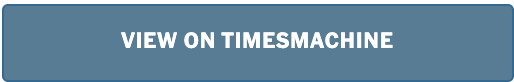

# OPTIONAL #1 (if you're not exhausted)

If you can "View on Timesmachine", look for some type of **Index** on the front page that you are viewing.  If you find it, then identify the pages of a _Section_ that interests you.

Display the rows from TWO pages from that section.

- Create another DataFrame called `section_df` with only rows from the `print_page` that you identified above.
 - Use something like this to select the appropriate rows from `dobarticles_df`.
   - `dobarticles_df["print_page"].isin(["22","23"])`
- How many articles are in `section_df`?

In [ ]:
section_df = dobarticles_df[ dobarticles_df["print_page"].isin(["22","23"]) ]
section_df.shape

(15, 19)

# OPTIONAL #2 (if you're still not exhausted)

Let's search all articles containing an interesting keyword of your choice that appears in the _main headline_.  

The **desired goal**:
- Display the _main headline_ of all articles in the dataset `dobarticles_df` where `myKeyword` appears.
- List the URLs of all these articles.

Steps:
- Hardcode a variable `myKeyword` with a string of your choice - the word that you want to search all articles for.
- Create a list `urlList = []`
- Create a counter `i = 0`.
- Use a `for` loop to walk through the `headline` column of the dataframe
 - `dobarticles_df.headline`
 - Store the `main` key in a variable called `mainheadline`.  Since that's a string, you should use the `lower()` function to normalize the string data.
 - `if myKeyword in mainheadline`, then do the following:
   - Print out `mainheadline`.
   - Append the associated URL in the `web_url` key to `urlList`:
    - `dobarticles_df.iloc[i].web_url`
 - Be sure that you increment the counter inside the `for` loop but outside the `if` statement.  This counter is ensuring that you are tracking the row in the DataFrame where you query the `mainheadline` for the `keyword`.


In [ ]:
# section_df = dobarticles_df[ dobarticles_df["headline"].isin(["22","23"]) ]

#main_headline = [d.get('main') for d in dobarticles_df.headline]
#print(len(main_headline))
#dobarticles_df.shape

myKeyword = ""
urlList = []
i = 0
for d in dobarticles_df.headline:

  i += 1
for url in urlList:
  print(url)